## Klizanje na CartPoleu

> **Problem**: Ako Peter želi pobjeći od vuka, mora se kretati brže od njega. Vidjet ćemo kako Peter može naučiti klizati, posebno kako održavati ravnotežu, koristeći Q-Learning.

Prvo, instalirajmo gym i uvezimo potrebne biblioteke:


In [1]:
#code block 1

## Stvorite okruženje cartpole


In [ ]:
#code block 2

Da bismo vidjeli kako okruženje funkcionira, pokrenimo kratku simulaciju od 100 koraka.


In [ ]:
#code block 3

Tijekom simulacije trebamo dobiti opažanja kako bismo odlučili kako postupiti. Zapravo, funkcija `step` nam vraća trenutna opažanja, funkciju nagrade i zastavicu `done` koja pokazuje ima li smisla nastaviti simulaciju ili ne:


In [ ]:
#code block 4

Možemo dobiti minimalnu i maksimalnu vrijednost tih brojeva:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Hajdemo također istražiti drugu metodu diskretizacije koristeći binove:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Hajdemo sada pokrenuti kratku simulaciju i promatrati te diskretne vrijednosti okruženja.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Struktura Q-Tablice


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


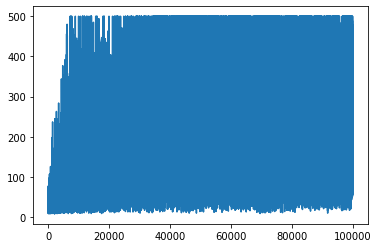

In [20]:
plt.plot(rewards)

S ovog grafikona nije moguće ništa zaključiti, jer zbog prirode stohastičkog procesa treniranja duljina sesija treniranja jako varira. Kako bismo bolje razumjeli ovaj grafikon, možemo izračunati **pokretni prosjek** preko serije eksperimenata, recimo 100. To se može jednostavno napraviti koristeći `np.convolve`:


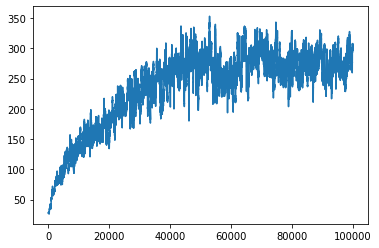

In [22]:
#code block 12

## Variranje hiperparametara i promatranje rezultata u praksi

Sada bi bilo zanimljivo vidjeti kako se trenirani model zapravo ponaša. Pokrenimo simulaciju, i slijedit ćemo istu strategiju odabira akcija kao tijekom treninga: uzorkovanje prema distribuciji vjerojatnosti u Q-Tablici:


In [23]:
# code block 13

## Spremanje rezultata u animirani GIF

Ako želite impresionirati svoje prijatelje, možda ćete im htjeti poslati animirani GIF sliku balansirajuće šipke. Da biste to učinili, možemo pozvati `env.render` za stvaranje slike okvira, a zatim ih spremiti u animirani GIF koristeći PIL biblioteku:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Odricanje od odgovornosti**:  
Ovaj dokument je preveden pomoću AI usluge za prevođenje [Co-op Translator](https://github.com/Azure/co-op-translator). Iako nastojimo osigurati točnost, imajte na umu da automatski prijevodi mogu sadržavati pogreške ili netočnosti. Izvorni dokument na izvornom jeziku treba smatrati autoritativnim izvorom. Za kritične informacije preporučuje se profesionalni prijevod od strane ljudskog prevoditelja. Ne preuzimamo odgovornost za nesporazume ili pogrešna tumačenja koja mogu proizaći iz korištenja ovog prijevoda.
